<font size="5"> Summary </font>


In this analysis, primary goal is to find the factors that impact transmission rate of COVID-19. 
To be very precise, i am trying to answer the below question:

***What are the key factors which impact the transmission of COVID-19 ?***

Some of the key factors are:

1. Temperature
1. Relative Humidity
1. Air Travel

Kindly have a good look at the figures given below. Rest of my analysis predominantly revolves around this.

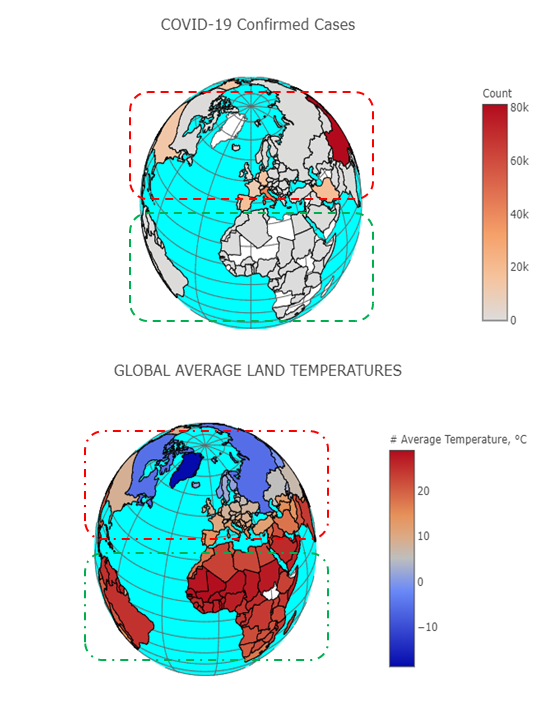

**Red rectangle (Temperate zone) is a cause of concern. Green rectangle (Tropical zone) is safer. **
However, for more clarity, you can zoom and pan the actual visuals in this notebook.

The below research paper also substantiates my insights. I would quote certain excerpts, directly from this paper, in this report.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3311988/

**Edit 1 : In addition to the above analysis, i have tried pictorially to co-relate air travel with the spread. The below image shows the same**

1. The image in the top half is the snapshot of the spread , as of 1st Mar 2020. 
1. The image in the bottom half shows major air routes from Beijing to rest of the world. 
1. The red arrows tries to co-relate the air routes to the direction of spread.

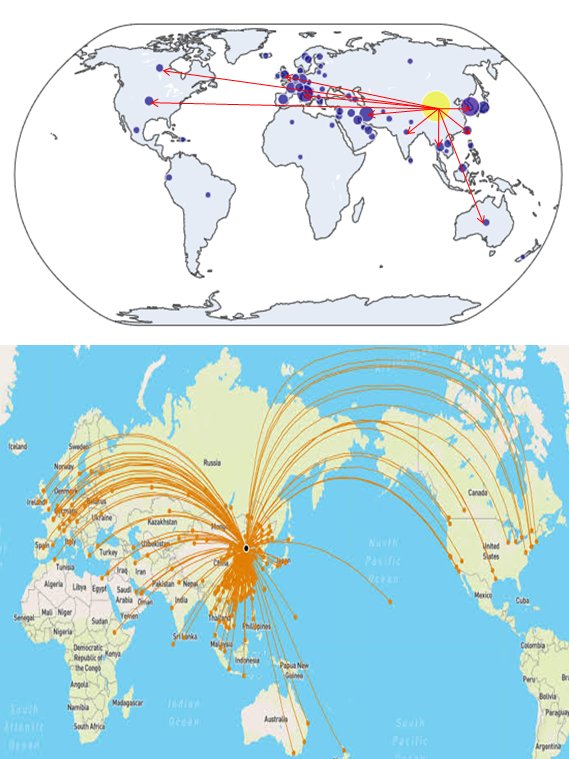

*Note: The mentioned insights in this notebook are as per the evolving COVID-19 datasets. They are fairly intuitive and may not be 100% accurate at this stage. Detailed statistical analysis will be done, when the dataset stabilises over a period of time.  However, correlations with important factors like temperature, relative humidity and air travel, are performed to predict the transmission rates and my personal opinion is that the insights provided in this notebook is overall in line with globally published research information. *

,<font size="4">Section 1: Data Preperation</font>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Loading datasets required for analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

Step 1: Reading and understanding the data

In [ ]:
full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
full_table.head()

The above shows the headers and a top slice of the table. I think this is self-explanatory.

Step 2: Preparing the data

In [ ]:
# Defining COVID-19 cases as per classifications 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Defining Active Case: Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# Renaming Mainland china as China in the data table
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Country/Region'].str.contains('Cruise Ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

Step 3: Creating a consolidated table , which gives the country wise total defined cases

In [ ]:
temp = full_table.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()

In [ ]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

In [ ]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

**Finally, this is how the table looks like and our analysis is baselined with this table**

In [ ]:
temp_f.head(10)

<font size="4">Section 2: Data Visualisation</font>

In this section, we are just going to see four self-explanatory visuals, which will substantiate the answers and insights in the next section.

**Visual 1 :** A Time-series graph of the confirmed and recovered cases of COVID-19

In [ ]:
import plotly as py
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING

#Time Series plot for knwoing the spread

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=full_table.Date,
                y=full_table['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=full_table.Date,
                y=full_table['Recovered'],
                name="Recovered",
                line_color='dimgray',
                opacity=0.8))
fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)
py.offline.iplot(fig)

**HOT SPOT 1 :**
1. Confirmed cases increasing steeply between 1st week of Feb to 3rd week of Feb
1. Recovered cases increasing steeply from 4th week of March
1. Rate of increase of confirmed cases significantly drops from March 1st week

**Visual 2 :** The pandemic and the planet - A live display of how the planet is with respect to confirmed cases of COVID-19.

Please pan the globe to check out the your zone, region , country.

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Calculating the count of confirmed cases by country

countries = np.unique(temp_f['Country/Region'])
mean_conf = []
for country in countries:
    mean_conf.append(temp_f[temp_f['Country/Region'] == country]['Confirmed'].sum())
    
# Building the dataframe

    data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_conf,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Count')
            )
       ]
    
# Building the visual

    layout = dict(
    title = 'COVID-19 Confirmed Cases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

**Visual 3 :** Planet Earth - Hot or Cold? ! - A live display of the average land temperatures of the planet

Sub-step: To read and understand the data

In [ ]:
import pandas as pd
global_temp_country = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")

In [ ]:
global_temp_country.head()

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Removing the duplicates

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Calculating average temperature by country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

# Building the data frame
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

# Building the visual

layout = dict(
    title = 'GLOBAL AVERAGE LAND TEMPERATURES',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

**Visual 4 :** Display of progression of spread across the globe

In [ ]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Progression of spread of COVID-19')
fig.update(layout_coloraxis_showscale=False)
py.offline.iplot(fig)

**HOT SPOT 2 :** The spread is much more than in the temperate zone of the planet compared to tropical zones. 
Moreover,  drier parts of the world has lesser transmission. 
You , can play this multiple times to get a deeper understanding

<font size="4"> Section 3: Discussion and comments </font>


I would like to keep this section short and sweet. However, i would urge the readers to pan and zoom all the visuals in the previous section to get more clarity on the following answers and insights. 

Also, please revisit the HOT-SPOTs in the earlier sections for help. Apologies, if i am making it too obvious or formal !

**3.1  My insights on the above analysis**

1. Temperature is a very important factor for the virus to thrive. 
1. The virus would not be be able to thrive in warmer climates or surroundings
1. The rate of transmission now is maximum in the temperate zone of the planet, where the avg. temp is 5-10 deg C
1. The above mentioned temp range is conducive for the virus to thrive
1. However, the transmission is minimal in the tropical zone, where the avg. temp is > 25 deg C

**3.2 Substantiation from research**

I would like to provide an evedential excerpt from the earlier mentioned research paper, for your reference here, as below. 


*In the early 1960s, Schulman and Kilbourne developed an influenza virus transmission model in mice. Although mouse-to-mouse transmission is relatively inefficient, they still observed a significant decrease in transmission efficiency with increasing relative humidity (RH) [23] and during summer months, even when laboratory temperature and RH were controlled during experiments [24]. Lowen et al. expanded upon these experiments in the guinea pig transmission model. At 20°C, transmission efficiency of an influenza A/H3N2 isolate displayed a bimodal dependence on RH, with airborne (i.e., droplet or aerosol) transmission being maximal at 20–35% RH, poor at 50% RH, moderate at 65% RH, and absent at 80% RH. At 5°C, transmission was overall more efficient than at 20°C, and the relationship between RH and transmission efficiency was montonic, with efficiency decreasing with increasing RH [25]. Transmission was abolished at high temperature (30°C), regardless of RH [26].*

**Closing comments**

So friends, keep yourself in warm and dry environments. 

Please follow all safety precautions as mentioned by WHO and other health & safety authorities. 

**Please read the last line in the above excerpt, again and again. Summers are fast approaching !! Do not worry !**

Lets Stay positive and healthy !!

<font size="4"> Section 4: Predictive analytics </font>

In [ ]:
import warnings

from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 8]

warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('../input/covid19-global-forecasting-week-1/train.csv',
    parse_dates=['Date']).drop(['Lat', 'Long'], axis=1)
test = pd.read_csv('../input/covid19-global-forecasting-week-1/test.csv',
    parse_dates=['Date']).drop(['Lat', 'Long'], axis=1)
submission = pd.read_csv('../input/covid19-global-forecasting-week-1/submission.csv',
    index_col='ForecastId')

In [ ]:
train.iloc[6425,4] = 0

**SECTION 4.1 : PREDICTION THROUGH THE SIR MODEL ** 

*Below exerpts from wikipedia*

The SIR model is one of the simplest compartmental models, and many models are derivations of this basic form. The model consists of three compartments: S for the number of susceptible, I for the number of infectious, and R for the number recovered (or immune) individuals. This model is reasonably predictive for infectious diseases which are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella.


Spatial SIR model simulation. Each cell can infect its eight immediate neighbors.
These variables (S, I, and R) represent the number of people in each compartment at a particular time. To represent that the number of susceptible, infected and recovered individuals may vary over time (even if the total population size remains constant), we make the precise numbers a function of t (time): S(t), I(t) and R(t). For a specific disease in a specific population, these functions may be worked out in order to predict possible outbreaks and bring them under control.

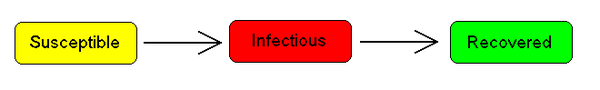

THE BELOW CODE SNIPPETS ARE FOR IMPLEMENTATION OF THE SIR MODEL

In [ ]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [ ]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [ ]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

The below model considers a sliglty reduced transmission rate, considering temperature factor

In [ ]:
 # Parameters of the model
N = 7800*(10**6)
b0 = 0
beta = 0.6 # Tranmission rate reduced considering factor
gamma = 0.3
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

Observations from the above
1. The number of infected cases increases for a certain time period, and then eventually decreases given that individuals recover/decease from the disease
1. The susceptible fraction of population decreases as the virus is transmited, to eventually drop to the absorbent state 0
1. The oposite happens for the recovered/deceased case
Notice that different initial conditions and parameter values will lead to other scenarios, feel free to play with these numbers to study the system.

Section 4.2 : PLOTS FOR SUBMISSION - Combining a logistic growth model with SIR

Ref: https://assets.tue.nl/fileadmin/content/pers/2020/03%20March/TUe%20-%20Technical_Report_Prediction_Corona_Virus.pdf

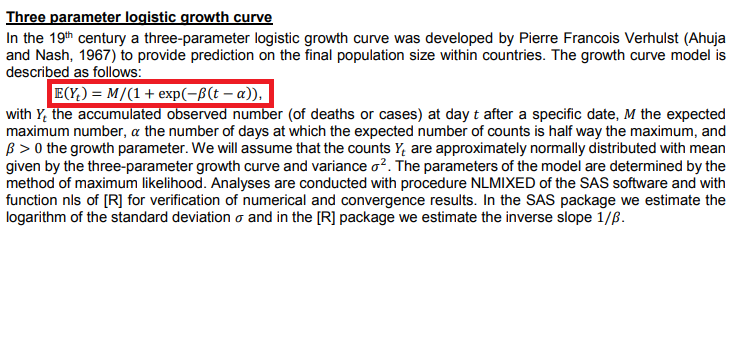

In [ ]:
def sigmoid(x, m, alpha, beta):
    return m / ( 1 + np.exp(-beta * (x - alpha)))

In [ ]:
def get_curve(covid, which):
    covid['DaysPassed'] = covid['Date'].dt.dayofyear
    curve = covid[covid[which] > 0].set_index('DaysPassed')[which]
    if curve.index.size > 4:
        return curve
    

def plot_curve(curve, test, name, plot_n, popt, ax):
    if curve is not None:
        _ = curve.plot(ax=ax[plot_n % 5, plot_n // 5], title=name)
        _.set_xlabel('')
        x = np.append(curve[:-12].index.values, test['Date'].dt.dayofyear.values)
        y = sigmoid(x, popt[0], popt[1], popt[2])
        pd.Series(y, x).plot(ax=ax[plot_n % 5, plot_n // 5], style=':')
    else:
        pd.Series(0).plot(ax=ax[plot_n % 5, plot_n // 5], title=name)

    
def predict_curve(covid, test, popt, which):
    train_curve = get_curve(covid, which)
    if train_curve is not None:
        x_train = train_curve.index.values
        y_train = train_curve.values
        popt, _ = curve_fit(sigmoid, x_train, y_train, p0=popt, maxfev=1000000)
        x_test = test['Date'].dt.dayofyear.values
        y_test = sigmoid(x_test, popt[0], popt[1], popt[2])
        test[which] = y_test
        return test.set_index('ForecastId')[which].astype('int'), popt
    return None, None


def append_predictions(train, test, popts):
    cases_popt, fatalities_popt = popts
    cases, cases_popt = predict_curve(train, test, cases_popt, 'ConfirmedCases')
    if cases is not None:
        CASES_ALL.append(cases)
    fatalities, fatalities_popt = predict_curve(train, test, fatalities_popt, 'Fatalities')
    if fatalities is not None:
        FATALITIES_ALL.append(fatalities)
    return cases_popt, fatalities_popt
   
    
def known_popt(country, region):
    known = {}
    known['cases'] = {
        'Hubei': [67625, 18.7, 0.24],
        'China': [680, 13.3, 0.265],
    }
    known['fatalities'] = {
        'Hubei': [3007, 23.6, 0.17]
    }
    if region in known['cases']:
        cases_popt = known['cases'][region]
    elif country in known['cases']:
        cases_popt = known['cases'][country]
    else:
        cases_popt = [5000, 100, 0.2]
        
    if region in known['fatalities']:
        fatalities_popt = known['fatalities'][region]
    if country in known['fatalities']:
        fatalities_popt = known['fatalities'][country]
    else:
        fatalities_popt = [100, 150, 0.25]
    
    return cases_popt, fatalities_popt
    
    
def main():
    n = -1
    for country in tqdm(train['Country/Region'].unique()):
        country_train = train[train['Country/Region'] == country].copy()
        country_test = test[test['Country/Region'] == country].copy()
        if not country_train['Province/State'].isna().all():
            for region in country_train['Province/State'].unique():
                region_train = country_train[country_train['Province/State'] == region].copy()
                region_test = country_test[country_test['Province/State'] == region].copy()
                cases_popt, fatalities_popt = append_predictions(region_train, region_test, known_popt(country, region))
                if region in ['Hubei', 'Guangdong', 'Hunan', 'California', 'France', 'Netherlands']:
                    n += 1
                    plot_curve(get_curve(region_train, 'ConfirmedCases'), region_test, region, n, cases_popt, AX)
                    plot_curve(get_curve(region_train, 'Fatalities'), region_test, region, n, fatalities_popt, AXX)
        else:
            cases_popt, fatalities_popt = append_predictions(country_train, country_test, known_popt(country, None))
            if country in ['Italy', 'Spain', 'Mexico', 'India']:
                n += 1
                plot_curve(get_curve(country_train, 'ConfirmedCases'), country_test, country, n, cases_popt, AX)
                plot_curve(get_curve(country_train, 'Fatalities'), country_test, country, n, fatalities_popt, AXX)

In [ ]:
CASES_ALL = []
FIG, AX = plt.subplots(5, 2)
FIG.suptitle('Confirmed Cases')

FATALITIES_ALL = []
FIGG, AXX = plt.subplots(5, 2)
FIGG.suptitle('Fatalities')

main()

FIG.subplots_adjust(hspace=0.5)
FIGG.subplots_adjust(hspace=0.5)

In [ ]:
final = pd.DataFrame(pd.concat(CASES_ALL).reindex(index=submission.index, fill_value=1))
final = final.join(pd.DataFrame(pd.concat(FATALITIES_ALL).reindex(index=submission.index, fill_value=0)))
final = final.where(final['Fatalities'] <= final['ConfirmedCases'], final['ConfirmedCases'] * 0.06, axis=0)
final.to_csv('submission.csv')

Note: This work is highly inspired from few other kaggle kernels , github sources and other data science resources. Any traces of replications, which may appear , is purely co-incidental. Due respect & credit to all my fellow kagglers. Thanks !!